Observation 1:
Urban Areas have the most riders, drivers and total fares, by a significant margin.

Observation 2:
The average Rural fares is higher at $34.62, compared to $30.97 for Suburban and Urban is the lowest at $24.53 due to shorter rides.

Observation 3: 
Average number of rides per Driver during this period is 1.60 in Rural areas, 1.28 in Suburban areas, and 0.68 in the Urban setting.

Observation 4: 
Average revenue per driver during this time period is $55.49 in Rural areas. In Suburban areas, the average revenue per driver is $39.50. Urban revenue per driver is by far the lowest at $16.57.

Conclusions:  Urban trips are typically shorter, but the lower fares are offset by the much higher density of riders.  In short, Urban areas provide the most revenue potential.  With that said, the "Avg Fares per Driver" and "Avg Driver Revenue" statistics suggest there are far too many drivers in the Urban areas to be profitable from a driver perspective.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
#city_data_to_load.head()
#ride_data_to_load.head()

# Combine the data into a single dataset
city_ride = pd.merge(ride_data_to_load,city_data_to_load,how='left',on='city')

# Display the data table for preview
city_ride.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
GCityRide = city_ride.groupby(['city']+['type']+['driver_count'])

Ave_Fare = GCityRide['fare'].mean()

Total_Rides = GCityRide['ride_id'].count()

df = pd.DataFrame({"Average Fare":Ave_Fare, "Total Rides":Total_Rides})
df = df.reset_index()

# Bubble Plot of Ride Sharing Data

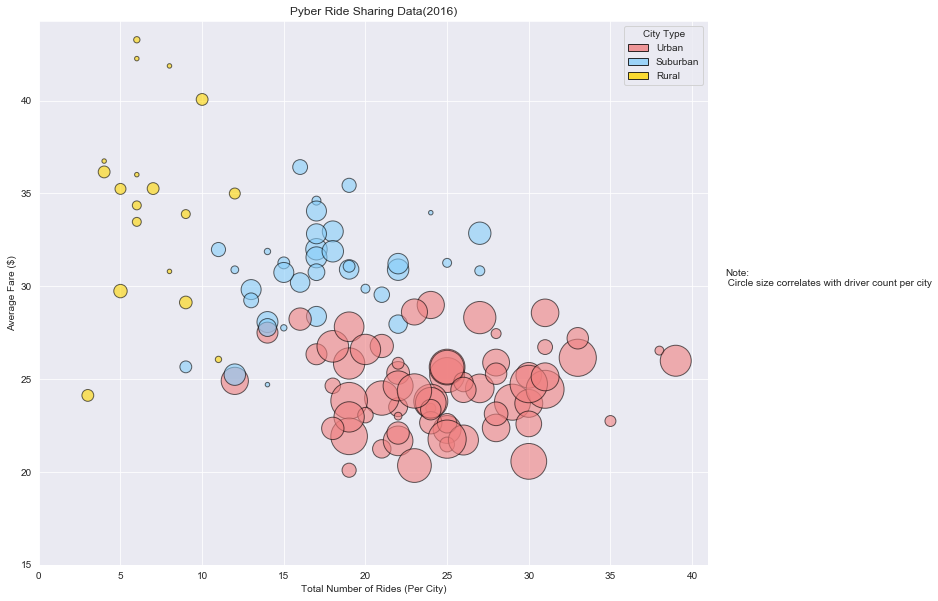

In [3]:
# use company colors
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}

import matplotlib.patches as mpatches

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.8,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.8,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.8,edgecolor="black", linewidth=1)

#Draw Bubble Chart
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(df['Total Rides'], df['Average Fare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

 # x and y limits
ax.set_xlim(0, max(df['Total Rides'])+2)
ax.set_ylim(15, max(df['Average Fare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")
ax.text(42,30,'Note:\n Circle size correlates with driver count per city')

# Show Figure
plt.show()         
                               

## Total Fares by City Type

In [33]:
# Build DF for all three Pie Charts (to be able to Recycle Pie plot code)

# Variables
GType = city_ride.groupby(['type'])
GGType = city_data_to_load.groupby(['type'])

# calculate
TFare = GType['fare'].sum()
TRides = GType['ride_id'].count()
TDrivers = GGType['driver_count'].sum()

#extra stuff for Analysis
Avg_Fare = TFare/TRides
Avg_Driver_Revenue = TRides/TDrivers*Avg_Fare
Avg_Num_Fares_Driver = TRides/TDrivers

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "Avg Fare":Avg_Fare, "TotalDrivers":TDrivers, "Avg # of Fares per Driver":Avg_Num_Fares_Driver, "Avg Driver Revenue":Avg_Driver_Revenue})
df1 = df1.reset_index()
df1.round(2).head()


,type,TotalFare,TotalRides,Avg Fare,TotalDrivers,Avg # of Fares per Driver,Avg Driver Revenue
0,Rural,4327.93,125,34.62,78,1.60,55.49
1,Suburban,19356.33,625,30.97,490,1.28,39.50
2,Urban,39854.38,1625,24.53,2405,0.68,16.57


Text(0.5,1,'% of Total Fares by City Type')

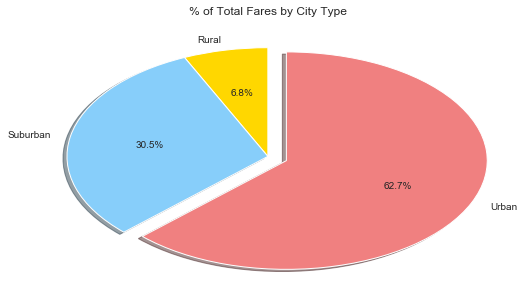

In [13]:
# Plot Total Fares by City Type
labels = df1['type']
sizes = df1['TotalFare']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('% of Total Fares by City Type')


## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

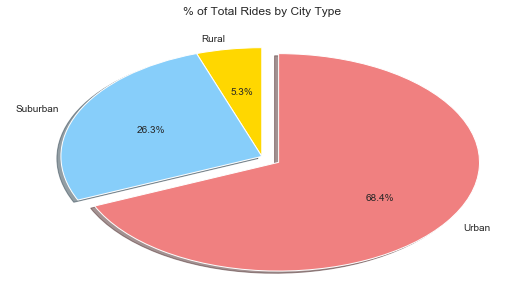

In [14]:
# Plot Total Rides by City Type
labels = df1['type']
sizes = df1['TotalRides']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('% of Total Rides by City Type')

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

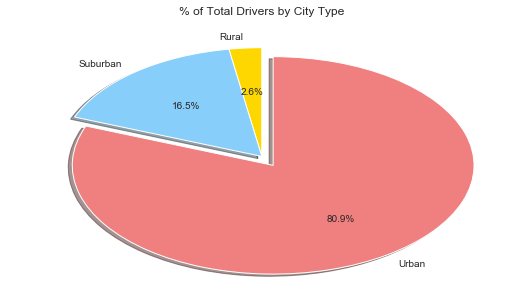

In [15]:
# Plot total Drivers by City Type
labels = df1['type']
sizes = df1['TotalDrivers']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('% of Total Drivers by City Type')